In [47]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [48]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(frac=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8558,8559,15774507,Furneaux,574,France,Female,39.0,5,119013.86,1,1.0,0.0,103421.91,0
2240,2241,15670345,Mazzi,785,Germany,Female,33.0,6,127211.45,1,0.0,0.0,191961.83,0
2675,2676,15682890,Woronoff,745,Germany,Male,38.0,5,65095.41,2,1.0,1.0,140197.42,0
5048,5049,15741416,Yegorov,707,France,Male,42.0,2,16893.59,1,1.0,1.0,77502.56,0
7659,7660,15598586,Wetherspoon,680,France,Male,31.0,10,113292.17,1,1.0,1.0,122639.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,15591969,Kuo,497,Spain,Male,27.0,9,75263.16,1,1.0,1.0,164825.04,0
173,174,15586310,Ting,578,France,Male,30.0,4,169462.09,1,1.0,0.0,112187.11,0
3697,3698,15565796,Docherty,745,Germany,Male,48.0,10,96048.55,1,1.0,0.0,74510.65,0
6270,6271,15702806,Martin,696,Spain,Male,24.0,9,0.00,1,0.0,0.0,10883.52,0


<Axes: >

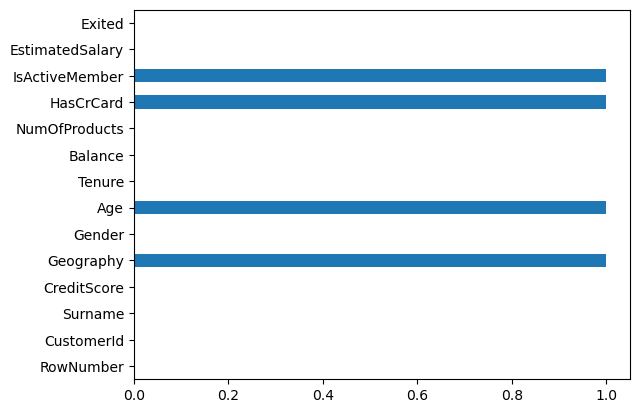

In [49]:
df.isna().sum().plot(kind='barh')

In [50]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [51]:
df['IsActiveMember'].fillna(df['IsActiveMember'].median(),inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].median(),inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Geography'].fillna('France',inplace=True)

In [52]:
#step 1 : Segregate Categorical columns nad numerical columns
categorical_col = df.select_dtypes(include='object')
numerical_col = df.select_dtypes(exclude='object')

In [53]:
from collections import OrderedDict

stats=[]
for col in numerical_col.columns:
  numerical_stats = OrderedDict({
      'feature':col,
      'mean':df[col].mean(),
      'median':df[col].quantile(0.50),
      'mode':df[col].mode()[0],
      'min':df[col].min(),
      'max':df[col].max(),
      'std':df[col].std(),
      'var':df[col].var(),
      'skew':df[col].skew(),
      'kurt':df[col].kurtosis(),
      'iqr':df[col].quantile(0.75)-df[col].quantile(0.25),
      'q1': df[col].quantile(0.25),
      'q3': df[col].quantile(0.75),
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report


,feature,mean,median,mode,min,max,std,var,skew,kurt,iqr,q1,q3
0,RowNumber,5.001500e+03,5001.50,9999.00,1.00,10000.00,2887.472338,8.337497e+06,-8.301804e-07,-1.200001,5000.5000,2501.25,7.501750e+03
1,CustomerId,1.569093e+07,15690732.00,15628319.00,15565701.00,15815690.00,71931.769345,5.174179e+09,1.379949e-03,-1.195972,124700.7500,15628524.75,1.575323e+07
2,CreditScore,6.505551e+02,652.00,850.00,350.00,850.00,96.661615,9.343468e+03,-7.187787e-02,-0.426340,134.0000,584.00,7.180000e+02
3,Age,3.892212e+01,37.00,37.00,18.00,92.00,10.486693,1.099707e+02,1.011392e+00,1.396161,12.0000,32.00,4.400000e+01
4,Tenure,5.012498e+00,5.00,2.00,0.00,10.00,2.891973,8.363507e+00,1.126740e-02,-1.165051,4.0000,3.00,7.000000e+00
5,Balance,7.649111e+04,97198.54,0.00,0.00,250898.09,62393.474144,3.892946e+09,-1.412948e-01,-1.489231,127647.8400,0.00,1.276478e+05
6,NumOfProducts,1.530194e+00,1.00,1.00,1.00,4.00,0.581639,3.383043e-01,7.454846e-01,0.582777,1.0000,1.00,2.000000e+00
7,HasCrCard,7.055589e-01,1.00,1.00,0.00,1.00,0.455814,2.077663e-01,-9.021225e-01,-1.186412,1.0000,0.00,1.000000e+00
8,IsActiveMember,5.149970e-01,1.00,1.00,0.00,1.00,0.499800,2.498001e-01,-6.002401e-02,-1.996796,1.0000,0.00,1.000000e+00
9,EstimatedSalary,1.000833e+05,100185.24,24924.92,11.58,199992.48,57508.117802,3.307184e+09,2.320765e-03,-1.181446,98399.9025,50983.75,1.493837e+05


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

In [55]:
X = df.drop(columns = ['Exited','RowNumber','CustomerId','Surname'],axis= 1)
y = df['Exited']

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 42)

In [57]:
from imblearn.over_sampling import SMOTEN
SM = SMOTEN(random_state=42)
X_train,y_train = SM.fit_resample(X_train,y_train)

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_rf = RF.predict(X_test)
print("the accuracy score for random forest is:",accuracy_score(y_test,y_pred_rf))

the accuracy score for random forest is: 0.8460513162279241


In [60]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Classifier:  83.53882039320226


In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.5, 1, 1.5]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict and evaluate
y_pred = random_search.predict(X_test)
print(classification_report(y_test,y_pred_rf))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best Score: 0.8812889144633897
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2401
           1       0.65      0.49      0.56       600

    accuracy                           0.85      3001
   macro avg       0.77      0.71      0.73      3001
weighted avg       0.83      0.85      0.84      3001



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit model
random_search.fit(X_train, y_train)

# Results
print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Prediction & Evaluation
# y_pred = random_search.predict(X_test)
# print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best Score: 0.8769782650393207
